# Page View Time Series Visualizer

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

   1. Use Pandas to import the data from `fcc-forum-pageviews.csv`. Set the index to the "date" column.
    
   2. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
    
   3. Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to `examples/Figure_1.png`. The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
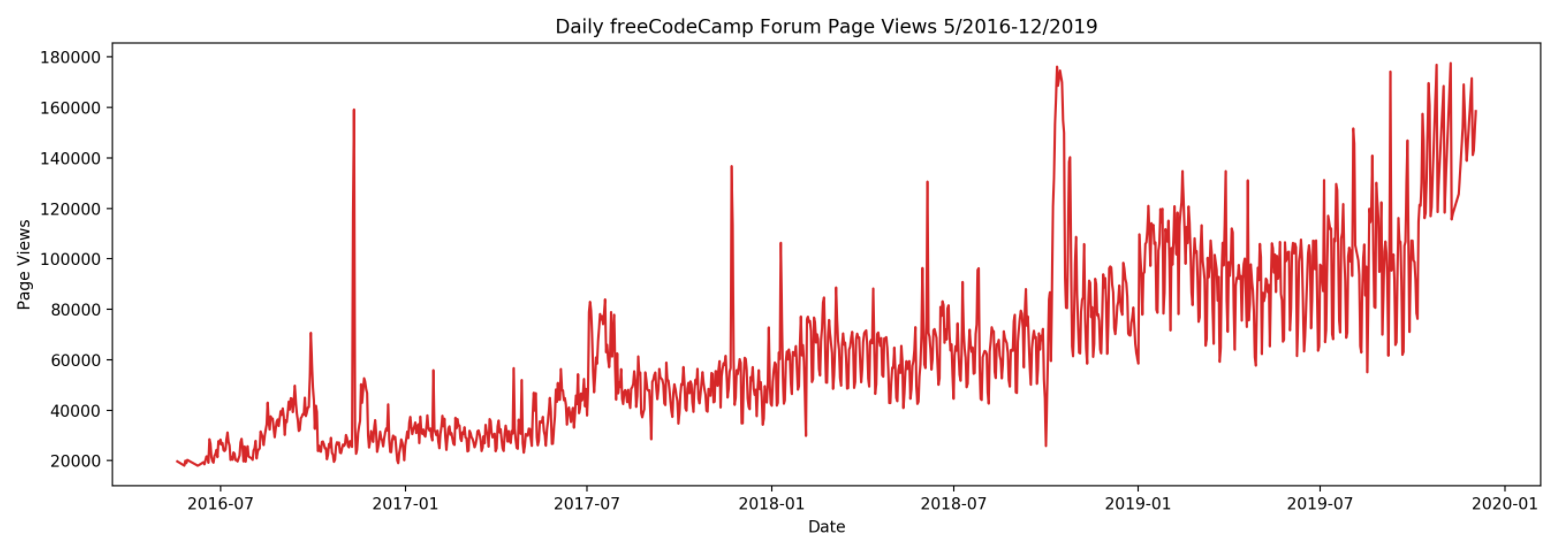   
    
    
    
   4. Create a `draw_bar_plot` function that draws a bar chart similar to `examples/Figure_2.png`. It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
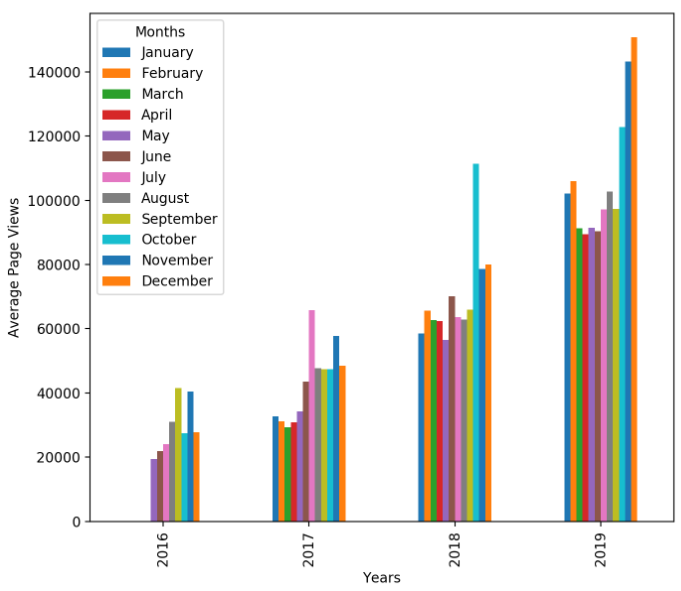
   
   
   
   5. Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to `examples/Figure_3.png`. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly. The boilerplate includes commands to prepare the data.
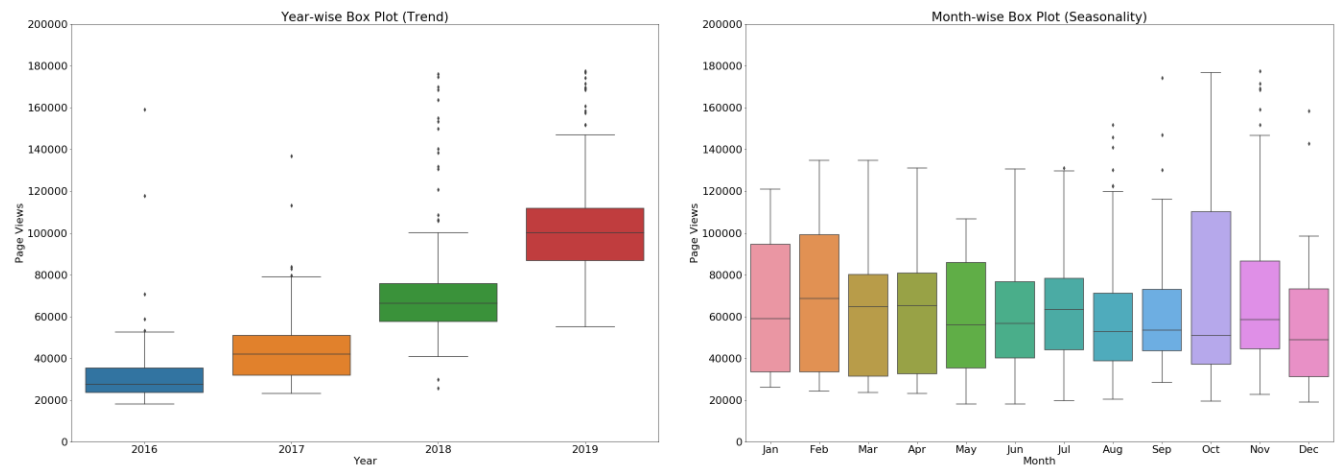


In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### 1. Use Pandas to import the data from `fcc-forum-pageviews.csv`. Set the index to the "date" column.

In [2]:
timeseries = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=True, index_col='date')

In [3]:
timeseries.head()

value
date             
2016-05-09   1201
2016-05-10   2329
2016-05-11   1716
2016-05-12  10539
2016-05-13   6933

In [4]:
timeseries.shape

(1304, 1)

### 2. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
##### *Getting rid of outlier data*
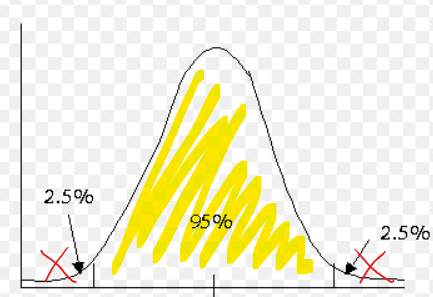

In [5]:
# 2.5% (include everything after) & 97.5% (include everything before)
timeseries_2p5 = timeseries[(timeseries['value'] >= timeseries['value'].quantile(0.025)) 
                            & (timeseries['value'] <= timeseries['value'].quantile(0.975))]

timeseries_2p5

value
date              
2016-05-19   19736
2016-05-26   18060
2016-05-27   19997
2016-05-28   19044
2016-05-29   20325
...            ...
2019-11-24  138875
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-03  158549

[1238 rows x 1 columns]

### 3. Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to `examples/Figure_1.png`. 
##### *The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019".* 
##### *The label on the x axis should be "Date" and the label on the y axis should be "Page Views".*

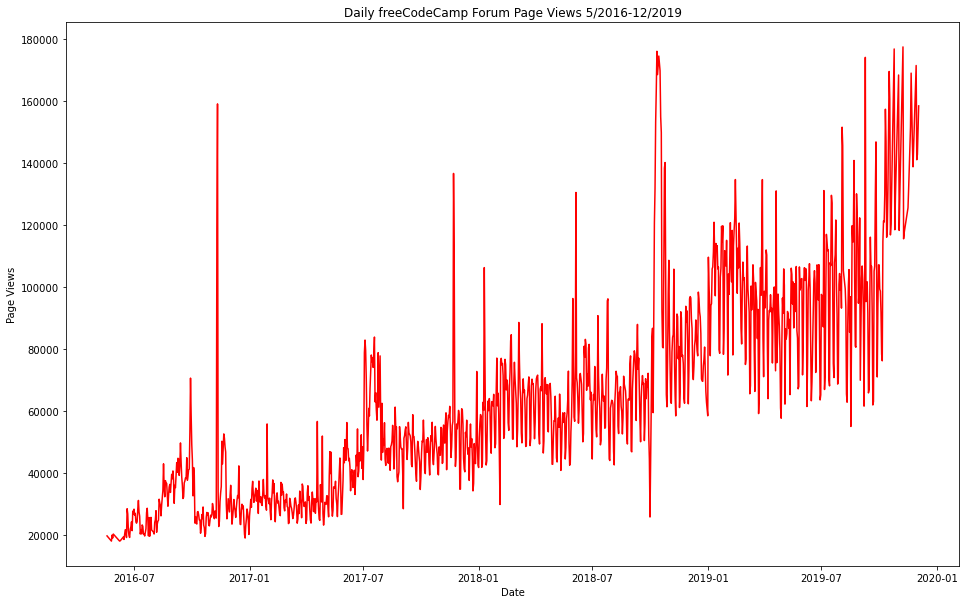

In [7]:
fig, ax = plt.subplots(figsize=(16,10))

# default color is blue
ax.plot(timeseries_2p5.index, timeseries_2p5.value, c='red')

ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

# format x-axis date tickers into MM-YYY format, like example
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

fig.savefig('line_plot.png')

In [8]:
# simpler version, but issue with x-axis, fixed above

# plt.figure(figsize=(16, 10))
# plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

# plt.plot(timeseries_2p5.index, timeseries_2p5.value)

# plt.xlabel('Date')
# plt.ylabel('Page Views')

# plt.show()

### 4. Create a `draw_bar_plot` function that draws a bar chart similar to `examples/Figure_2.png`. 
##### *It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months".* 
##### *On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".*

### 5. Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to `examples/Figure_3.png`. 
##### *These box plots should show how the values are distributed within a given year or month and how it compares over time.* 
##### *The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)".* 
##### *Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly. The boilerplate includes commands to prepare the data.*